In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
def sigmoid(Z): return 1 / (1 + np.exp(-Z))
def sigmoid_backward(dA, A): return dA * (A * (1 - A))

def relu(Z): return np.maximum(0, Z)
def relu_backward(dA, A): return dA * (A > 0).astype(float)


# Map names -> functions
activations = {
    "sigmoid": (sigmoid, sigmoid_backward),
    "relu": (relu, relu_backward),
    
}

In [3]:
def initialize_parameters(layer_dims):
    """
    layer_dims: list of dimensions [n_x, n_h1, n_h2, ..., n_y]
    """
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims) - 1  # number of layers

    for l in range(1, L+1):
        parameters[f"W{l}"] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters[f"b{l}"] = np.zeros((layer_dims[l], 1))
    return parameters

In [4]:
def forward_propagation(X, parameters, activations_list):
    cache = {"A0": X}
    A = X
    L = len(parameters) // 2

    for l in range(1, L+1):
        W, b = parameters[f"W{l}"], parameters[f"b{l}"]
        Z = np.dot(W, A) + b
        act, _ = activations[activations_list[l-1]]
        A = act(Z)
        cache[f"A{l}"] = A
        cache[f"Z{l}"] = Z
        cache[f"activation{l}"] = activations_list[l-1]
    return A, cache

In [5]:
def compute_cost(AL, Y):
    m = Y.shape[1]
    return -1/m * np.sum(Y*np.log(AL+1e-8) + (1-Y)*np.log(1-AL+1e-8))

In [19]:
def backward_prop(Y, cache, parameters, activations_list):
    grads = {}
    m = Y.shape[1]
    L = len(parameters) // 2

    AL = cache[f"A{L}"]

    # last layer: sigmoid + cross-entropy
    dZ = AL - Y
    A_prev = cache[f"A{L-1}"]
    grads[f"dW{L}"] = (1/m) * np.dot(dZ, A_prev.T)
    grads[f"db{L}"] = (1/m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(parameters[f"W{L}"].T, dZ)

    # hidden layers
    for l in reversed(range(1, L)):
        A = cache[f"A{l}"]
        A_prev = cache[f"A{l-1}"]
        activation = cache[f"activation{l}"]

        _, backward = activations[activation]
        dZ = backward(dA_prev, A)

        grads[f"dW{l}"] = (1/m) * np.dot(dZ, A_prev.T)
        grads[f"db{l}"] = (1/m) * np.sum(dZ, axis=1, keepdims=True)

        dA_prev = np.dot(parameters[f"W{l}"].T, dZ)

    return grads


In [7]:
def update_parameters(parameters, grads, alpha):
    L = len(parameters) // 2
    for l in range(1, L+1):
        parameters[f"W{l}"] -= alpha * grads[f"dW{l}"]
        parameters[f"b{l}"] -= alpha * grads[f"db{l}"]
    return parameters

In [23]:
def predict(X, parameters, activations_list):
    AL, _ = forward_propagation(X, parameters, activations_list)
    return (AL > 0.5).astype(int)

Epoch 0: Loss=0.693147, Train Accuracy=0.2612
Epoch 100: Loss=0.693147, Train Accuracy=0.8187
Epoch 200: Loss=0.693147, Train Accuracy=0.8150
Epoch 300: Loss=0.693147, Train Accuracy=0.8100
Epoch 400: Loss=0.693147, Train Accuracy=0.8100
Epoch 500: Loss=0.693147, Train Accuracy=0.8087
Epoch 600: Loss=0.693146, Train Accuracy=0.8087
Epoch 700: Loss=0.693146, Train Accuracy=0.8075
Epoch 800: Loss=0.693146, Train Accuracy=0.8075
Epoch 900: Loss=0.693146, Train Accuracy=0.8063


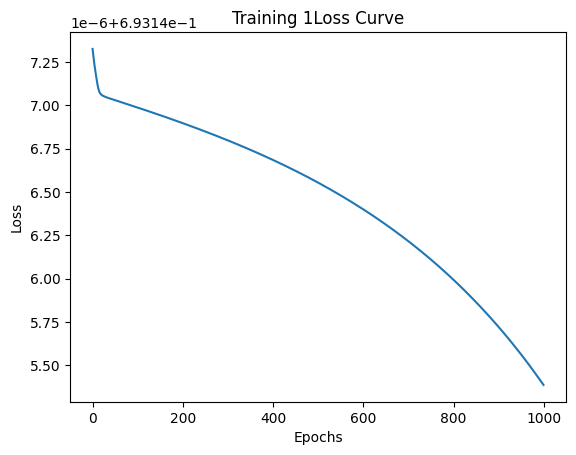

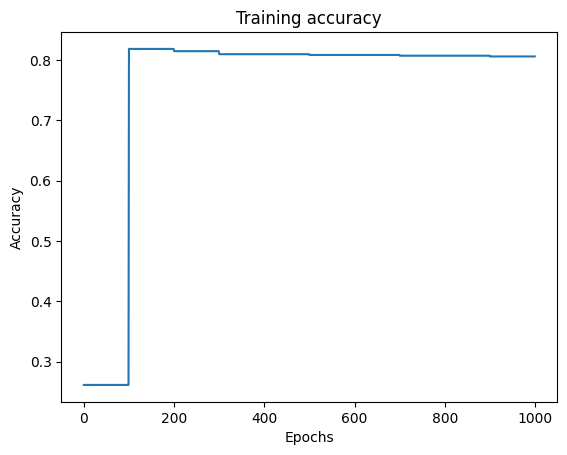


Final Test Accuracy: 0.7750


In [26]:
def main():
    # 1. Data
    X, Y = make_moons(n_samples=1000, noise=0.2, random_state=42)
    X, Y = X.T, Y.reshape(1, -1)

    X_train, X_test, Y_train, Y_test = train_test_split(X.T, Y.T, test_size=0.2, random_state=42)
    X_train, Y_train = X_train.T, Y_train.T
    X_test, Y_test = X_test.T, Y_test.T

    # 2. Architecture
    layer_dims = [X_train.shape[0], 8, 4, 1]
    activations_list = ["relu", "relu", "sigmoid"]

    # 3. Initialize
    parameters = initialize_parameters(layer_dims)

    # 4. Train
    epochs = 1000
    alpha = 0.1
    costs = []
    accuracy=[]

    for epoch in range(epochs):
        AL, cache = forward_propagation(X_train, parameters, activations_list)
        cost = compute_cost(AL, Y_train)
        grads = backward_prop(Y_train, cache, parameters, activations_list)
        parameters = update_parameters(parameters, grads, alpha)

        if epoch % 100 == 0:
            train_preds = predict(X_train, parameters, activations_list)
            acc = np.mean(train_preds == Y_train)
            print(f"Epoch {epoch}: Loss={cost:.6f}, Train Accuracy={acc:.4f}")
        costs.append(cost)
        accuracy.append(acc)

    # 5. Plot training loss
    plt.plot(costs)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training 1Loss Curve")
    plt.show()

    plt.plot(accuracy)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training accuracy")
    plt.show()

    # 6. Evaluate on Test set
    test_preds = predict(X_test, parameters, activations_list)
    test_acc = np.mean(test_preds == Y_test)
    print(f"\nFinal Test Accuracy: {test_acc:.4f}")

# ---------------- Run ----------------
main()